In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as c
import csv

In [3]:
cd "~\Google Drive\MAGPIE\data\2015\s0611_15"

C:\Users\jdavies\Google Drive\MAGPIE\data\2015\s0611_15


In [4]:
x_pos=[]
n_e=[]
Z=[]
T_e=[]
T_e_err=[]
T_i=[]
T_i_err=[]
V=[]
V_err=[]

filename='s0611_15 TS fits v3.dat'
with open(filename, 'r') as f:
    reader = csv.reader(f, delimiter='\t')
    next(reader)
    for row in reader:
        x_pos.append(float(row[3]))
        n_e.append(float(row[5]))
        Z.append(float(row[6]))
        T_e.append(float(row[7]))
        T_i.append(float(row[9]))
        V.append(float(row[11]))
        
x_pos=np.array(x_pos)*1e-3#m
n_e=np.array(n_e)*1e6#m^-3
Z=np.array(Z)
T_e=np.array(T_e)
T_i=np.array(T_i)
V=np.array(V)*1e3#m/s


In [5]:
def Harris_B(x, x0, B0, L,C):
    return B0*np.tanh((x-x0)/L)+C

def Harris_j(x, x0, B0, L):
    return -B0/(c.mu_0*L*(np.cosh((x-x0)/L))**2)
B0=2.84
L=0.52e-3
C=0
x0=0
x=x_pos#np.linspace(-2e-3,2e-3,1000)
B=Harris_B(x,x0,B0,L,C)
j=-Harris_j(x,x0,B0,L)

In [6]:
E0=-V[-1]*B[-1]

In [7]:
def col_log_eis(T_e,n_e,Z):
    if T_e<10*Z**2: #see NRL formulary pg 34
        col_log=23-np.log((n_e*1e-6)**0.5*Z*T_e**-1.5)
    else:
        col_log=24-np.log((n_e*1e-6)**0.5*T_e**-1.0)
    return col_log
col_log_ei=np.vectorize(col_log_eis)

eta=1.03e-2*Z*col_log_ei(T_e,n_e,Z)*T_e**-1.5 #ohm cm
eta=eta*1e-2#ohm m

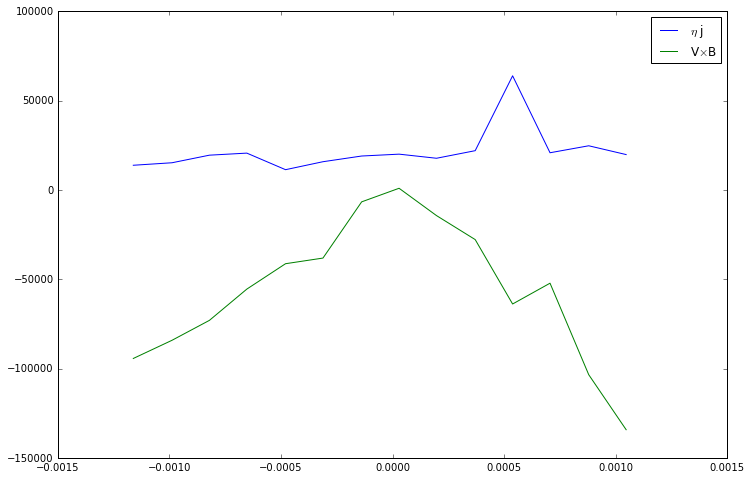

In [8]:
fig, ax=plt.subplots(figsize=(12,8))
ax.plot(x, eta*j, label=r'$\eta$ j')
ax.plot(x, V*B, label=r'V$\times$B')
ax.legend()

In [9]:
eta_eff=((E0+V*B)/j)/eta

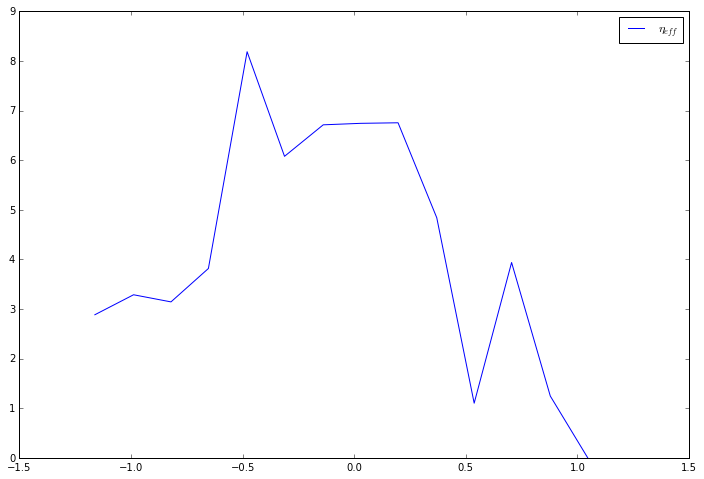

In [10]:
fig, ax=plt.subplots(figsize=(12,8))
ax.plot(x*1e3, eta_eff, label=r'$\eta_{eff}$')
ax.legend()

## Electron Pressure Gradient

In [11]:
P_e=n_e*T_e

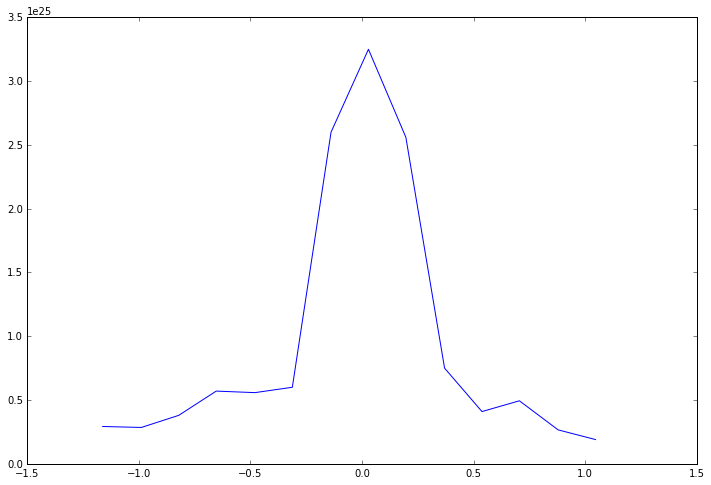

In [13]:
fig, ax=plt.subplots(figsize=(12,8))
ax.plot(x*1e3, P_e)

In [18]:
dP_edx=np.gradient(P_e, x[1]-x[0])

In [23]:
E_x=1/(n_e)*dP_edx

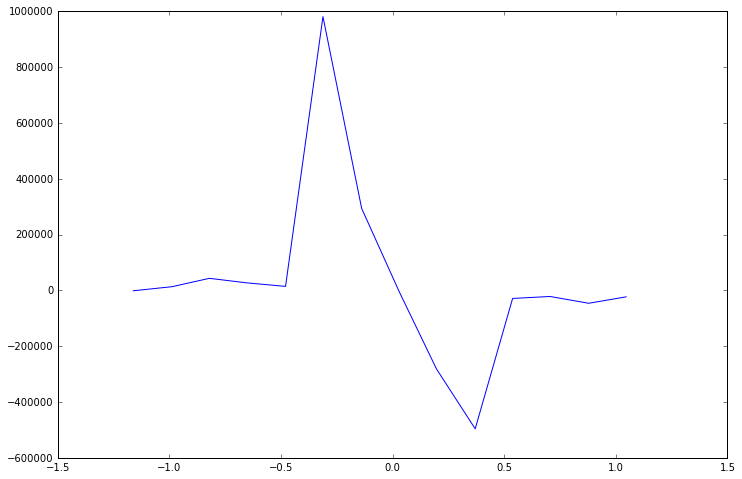

In [24]:
fig, ax=plt.subplots(figsize=(12,8))
ax.plot(x*1e3, E_x)

In [29]:
from scipy.integrate import cumtrapz

In [43]:
Phi=cumtrapz(E_x, x)
x_phi=x[:-1]+np.diff(x)/2.0

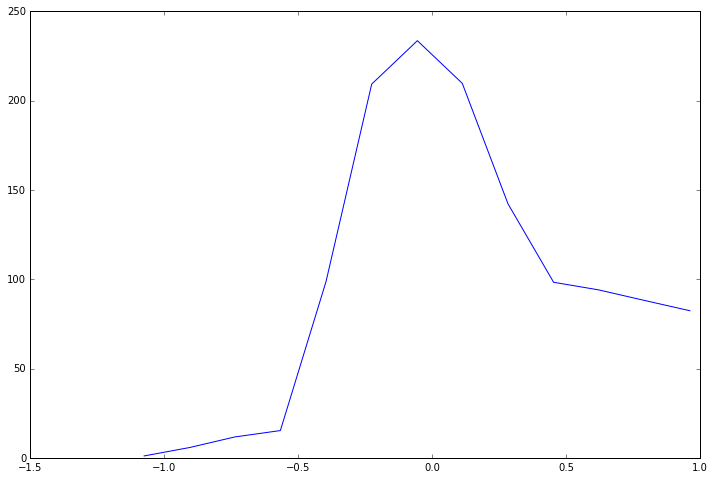

In [44]:
fig, ax=plt.subplots(figsize=(12,8))
ax.plot(x_phi*1e3, Phi)

In [46]:
Phi.max()

233.60864260008933

In [41]:
x

array([ -1.16184971e-03,  -9.88439306e-04,  -8.20809249e-04,
        -6.53179191e-04,  -4.79768786e-04,  -3.12138728e-04,
        -1.38728324e-04,   2.89017341e-05,   1.96531792e-04,
         3.69942197e-04,   5.37572254e-04,   7.05202312e-04,
         8.78612717e-04,   1.04624277e-03])

In [42]:
x_phi

array([ -1.07514451e-03,  -9.04624277e-04,  -7.36994220e-04,
        -5.66473988e-04,  -3.95953757e-04,  -2.25433526e-04,
        -5.49132948e-05,   1.12716763e-04,   2.83236994e-04,
         4.53757225e-04,   6.21387283e-04,   7.91907514e-04,
         9.62427746e-04])